In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import img_manip
from importlib import reload
import os

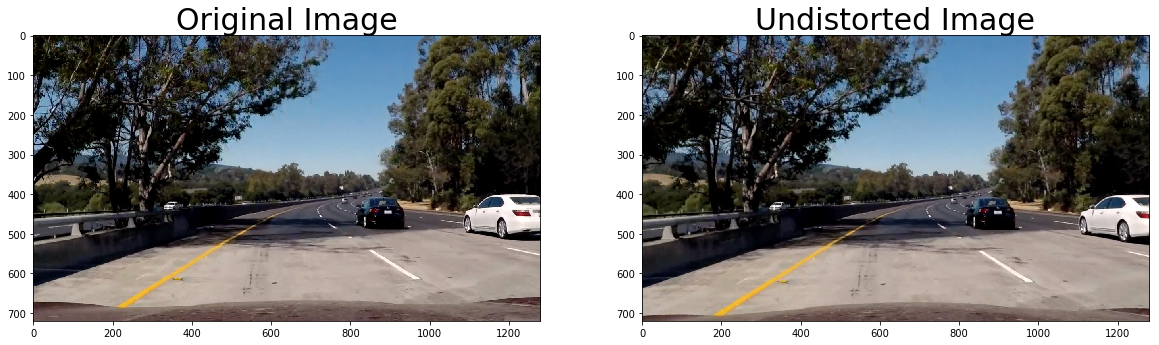

In [2]:
reload(img_manip)
image = cv2.cvtColor(cv2.imread('test_images/test5.jpg'),cv2.COLOR_BGR2RGB)
mtx, dist = img_manip.get_calibration_matrix()
dst = img_manip.undistort(image,mtx,dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

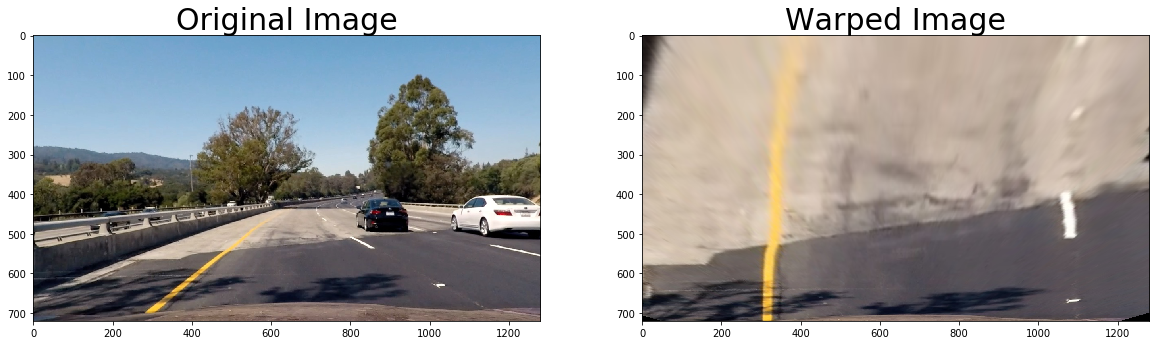

In [3]:
image = cv2.cvtColor(cv2.imread('test_images/test4.jpg'),cv2.COLOR_BGR2RGB)
dst = img_manip.undistort(image,mtx,dist)
warped = img_manip.warp(dst)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(dst)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(warped)
ax2.set_title('Warped Image', fontsize=30)
plt.show()

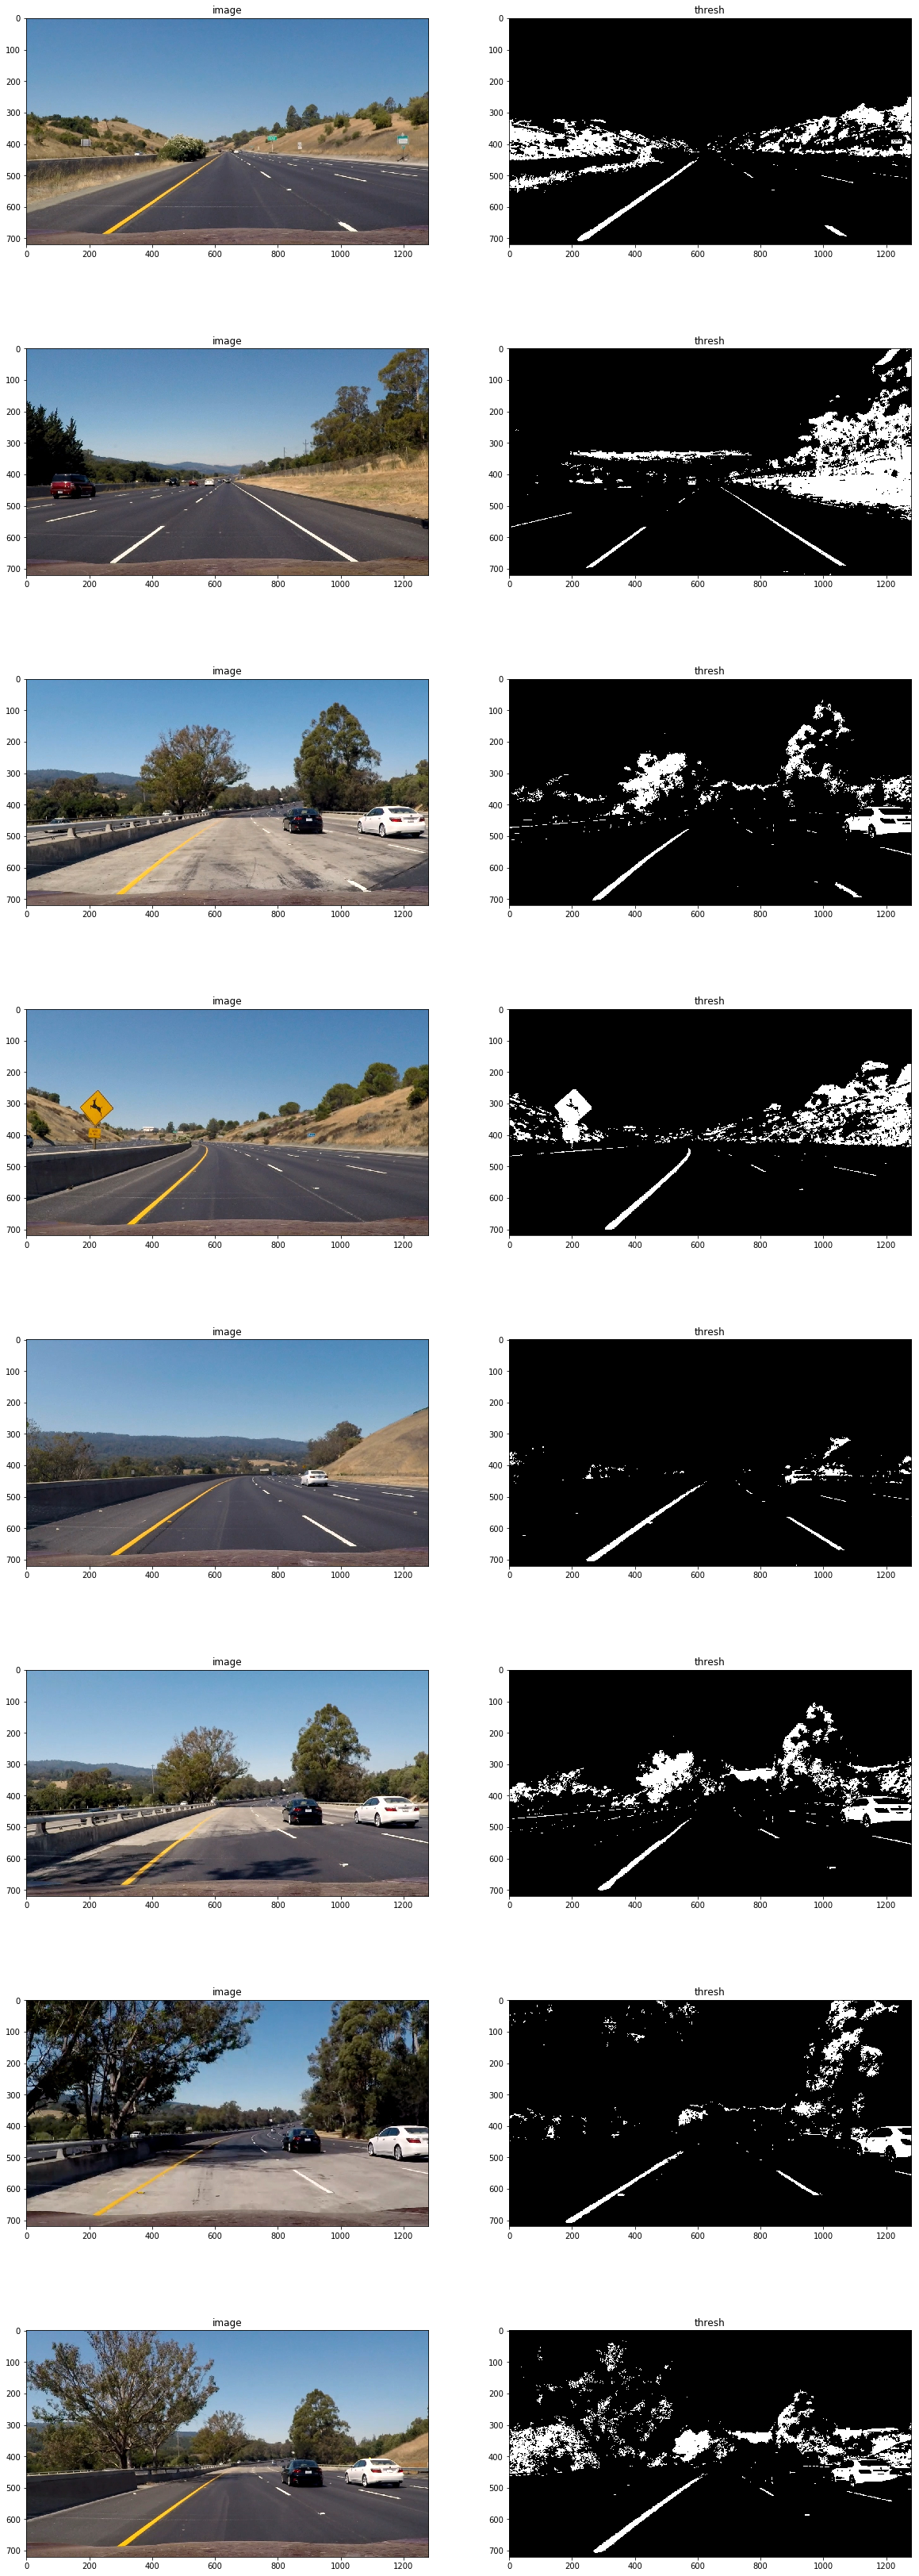

In [4]:
reload(img_manip)
test_images = os.listdir('test_images/')
num = len(test_images)

plt.figure(figsize=(20,60))
for idx, fname in enumerate(test_images):
    image = cv2.imread('test_images/'+ fname)
    dst = img_manip.undistort(image,mtx,dist)
    
    hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
    yellow_thresh = np.zeros_like(hsv[:,:,1])
    yellow_thresh[((hsv[:,:,0] > 15) & (hsv[:,:,0] < 30)) & (hsv[:,:,1] > 100) & (hsv[:,:,2]>50)] = 1
    
    white_thresh = np.zeros_like(yellow_thresh)
    white_thresh[(hsv[:,:,1] < 30) & (hsv[:,:,2]>200)] = 1
    
    color_thresh = (white_thresh + yellow_thresh).astype(np.uint8)
    
    plt.subplot(num,2,1+2*idx)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title('image')
    plt.subplot(num,2,2+2*idx)
    plt.imshow(color_thresh,cmap='gray')
    plt.title('thresh')
plt.show()

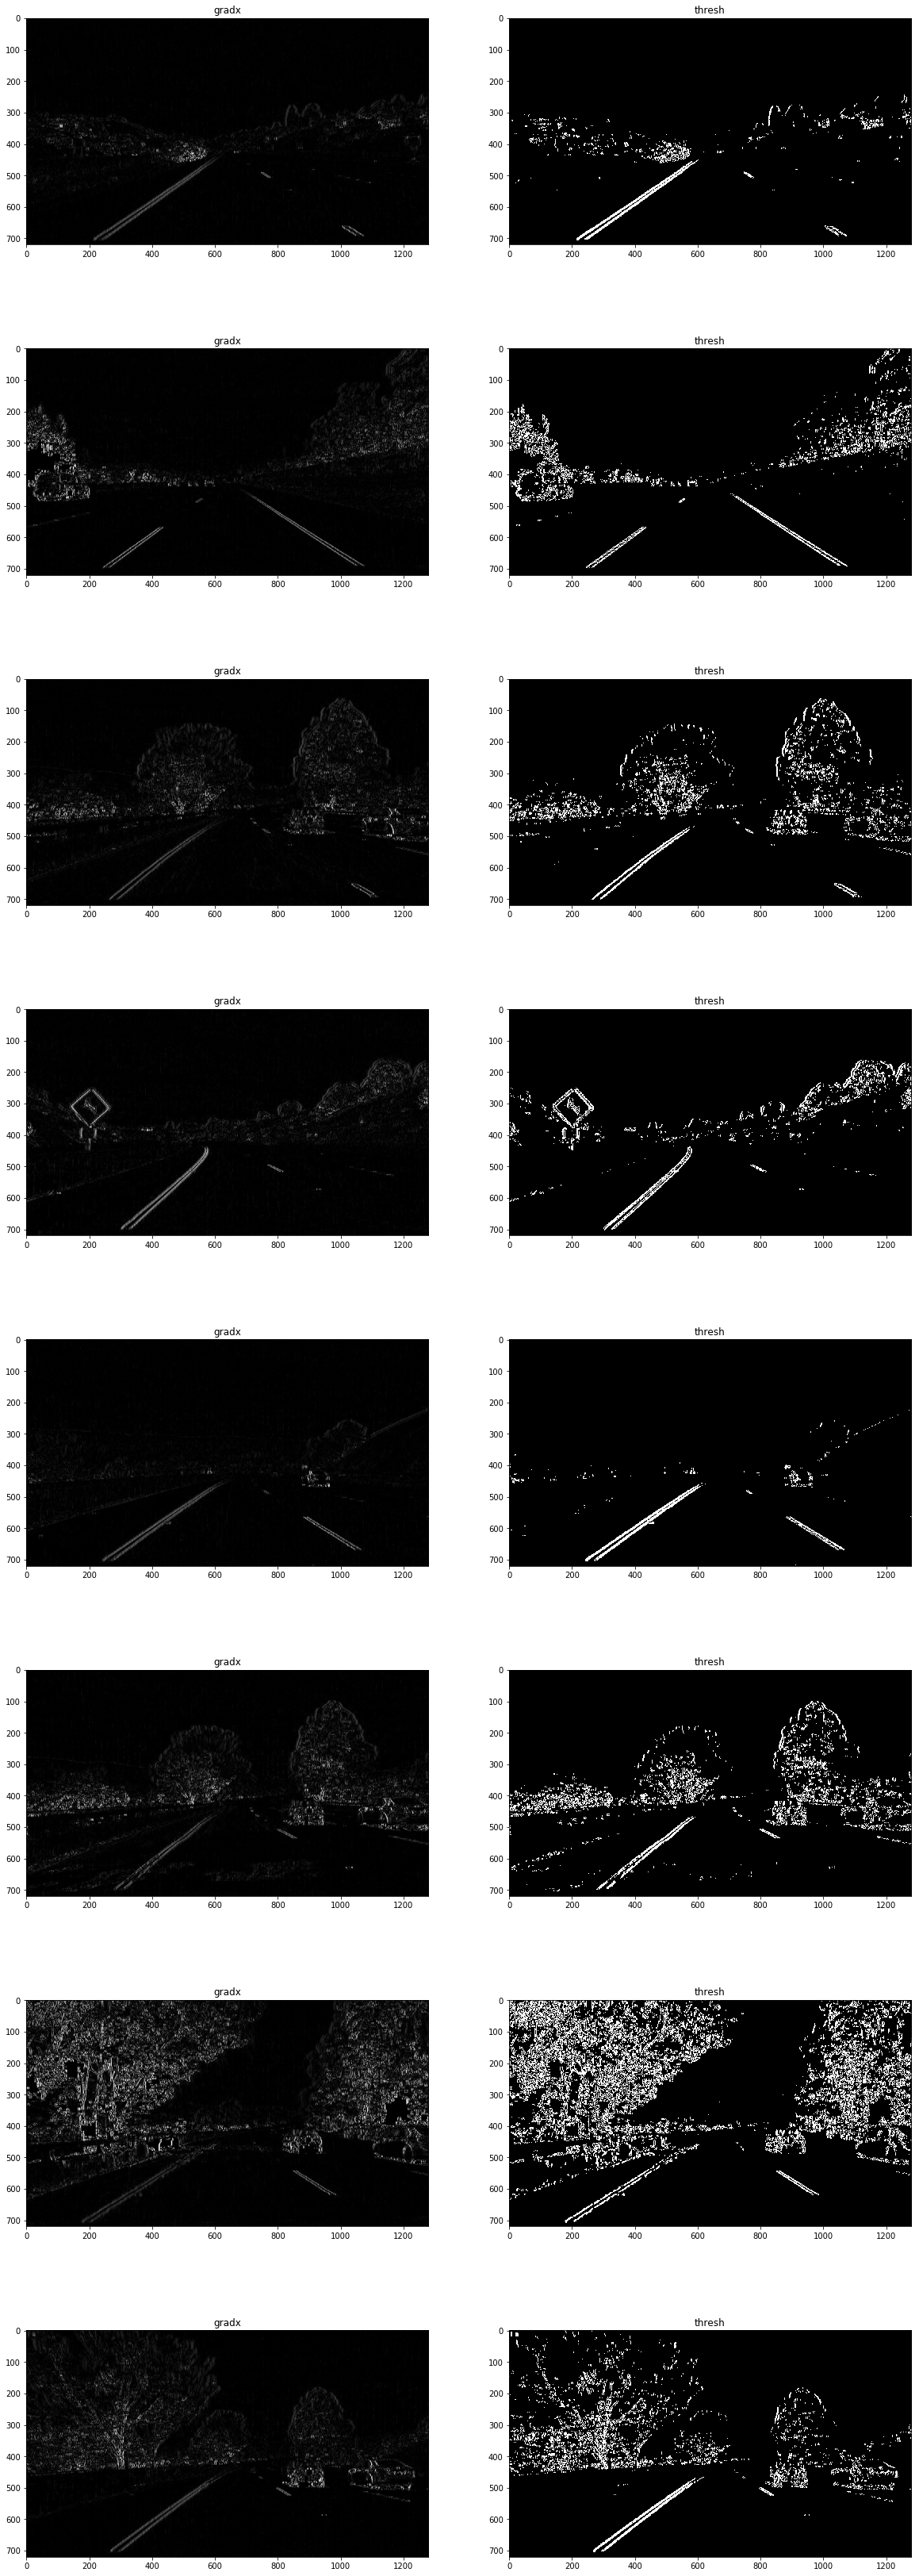

In [5]:
reload(img_manip)
test_images = os.listdir('test_images/')
num = len(test_images)

plt.figure(figsize=(20,60))
for idx, fname in enumerate(test_images):
    image = cv2.imread('test_images/'+ fname)
    dst = img_manip.undistort(image,mtx,dist)
    
    hls = cv2.cvtColor(dst, cv2.COLOR_BGR2HLS)
    gradx, gradx_thresh = img_manip.sobelx_thresh(hls[:,:,2],thresh=(30,120),ksize=9)
    
    plt.subplot(num,2,1+2*idx)
    plt.imshow(gradx,cmap='gray')
    plt.title('gradx')
    plt.subplot(num,2,2+2*idx)
    plt.imshow(gradx_thresh,cmap='gray')
    plt.title('thresh')
plt.show()

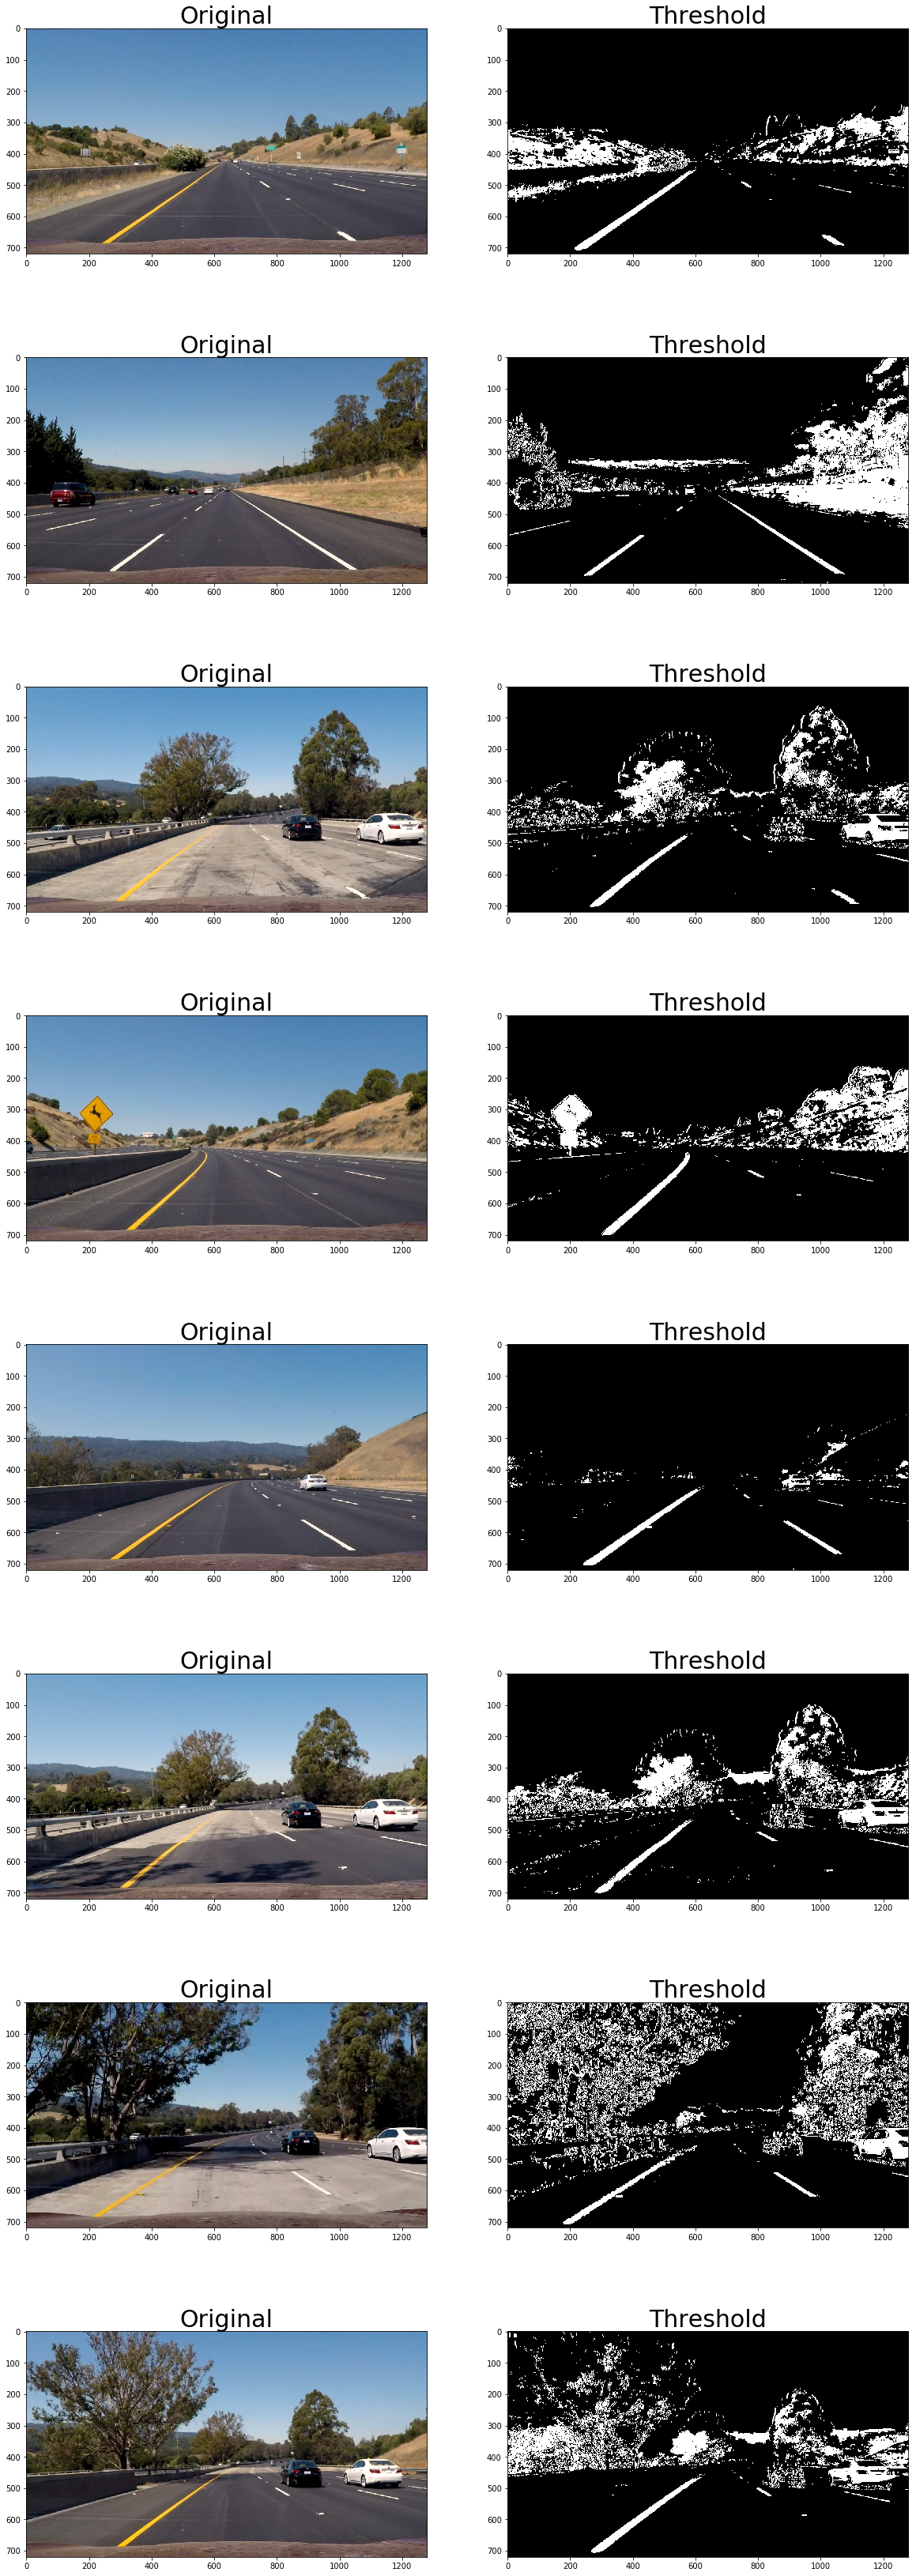

In [6]:
reload(img_manip)
test_images = os.listdir('test_images/')
binaries = []
num = len(test_images)

plt.figure(figsize=(20,60))
for idx, fname in enumerate(test_images):
    image = cv2.imread('test_images/'+ fname)
    dst = img_manip.undistort(image,mtx,dist)
    
    hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
    yellow_thresh = np.zeros_like(hsv[:,:,1])
    yellow_thresh[((hsv[:,:,0] > 15) & (hsv[:,:,0] < 30)) & (hsv[:,:,1] > 100) & (hsv[:,:,2]>50)] = 1
    
    white_thresh = np.zeros_like(yellow_thresh)
    white_thresh[(hsv[:,:,1] < 30) & (hsv[:,:,2]>200)] = 1
    
    color_thresh = (white_thresh + yellow_thresh).astype(np.uint8)
    
    hls = cv2.cvtColor(dst, cv2.COLOR_BGR2HLS)
    gradx, gradx_thresh = img_manip.sobelx_thresh(hls[:,:,2],thresh=(30,120),ksize=9)
    
    binary = np.bitwise_or(color_thresh,gradx_thresh.astype(np.uint8))
    binaries.append(binary)
    
    plt.subplot(num,2,1+2*idx)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title('Original',fontsize=30)
    plt.subplot(num,2,2+2*idx)
    plt.imshow(binary,cmap='gray')
    plt.title('Threshold',fontsize=30)
plt.show()

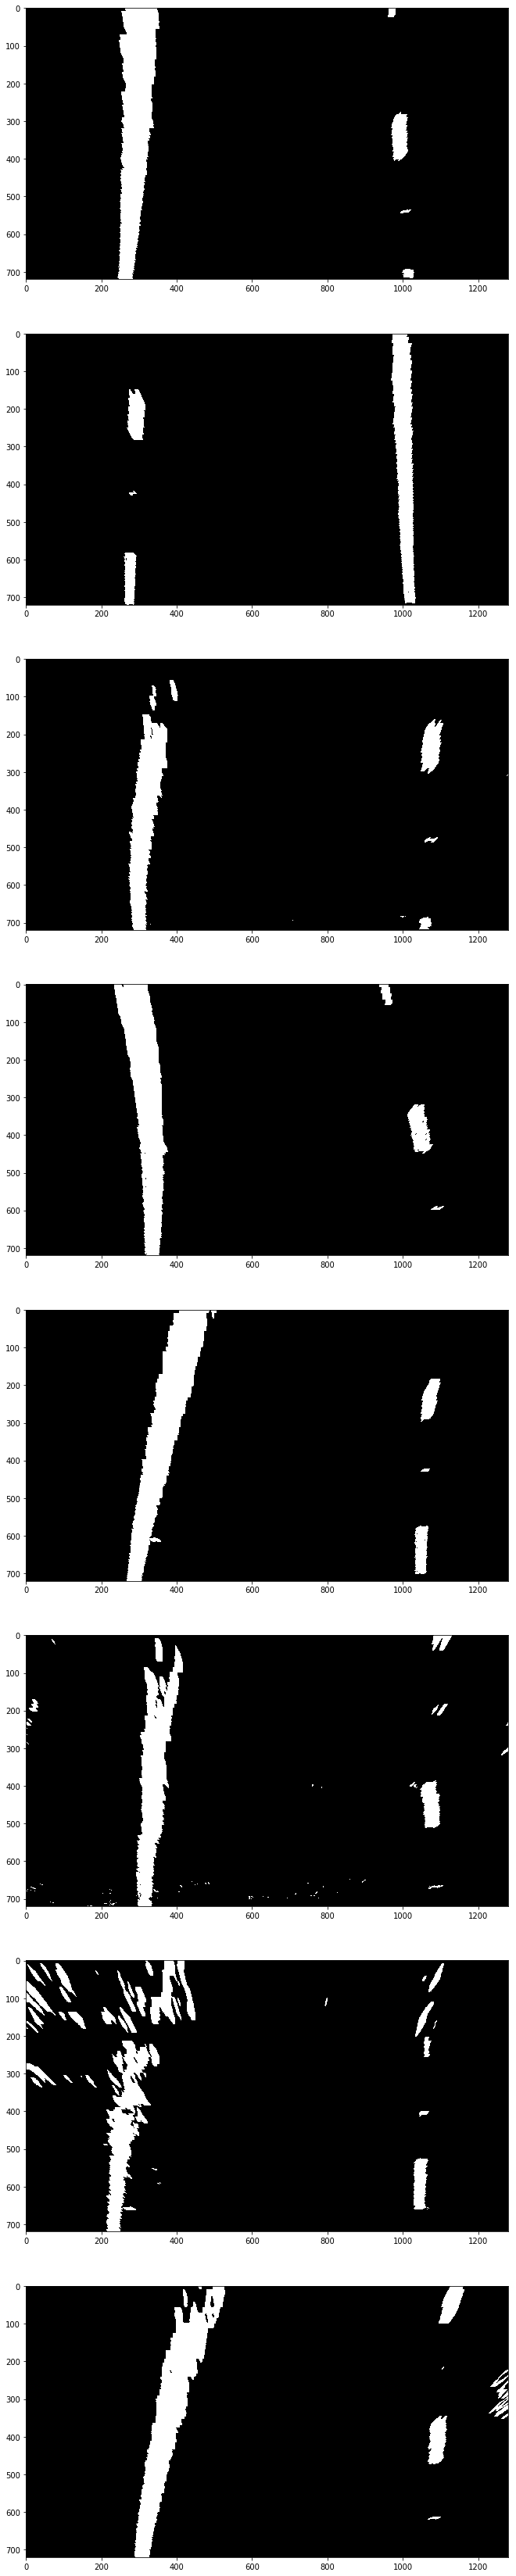

In [7]:
warps = []
num = len(test_images)

plt.figure(figsize=(20,60))
for idx,binary in enumerate(binaries):
    warped = img_manip.warp(binary)
    warps.append(warped*255)
    
    plt.subplot(num,1,idx+1)
    plt.imshow(warped, cmap='gray')
plt.show()

In [9]:
import lane_finder as lf
output = 'test_videos_output/project_video.mp4'
finder = lf.lane_finder()
%time finder.process_video("project_video.mp4",output)

Moviepy - Building video test_videos_output/project_video.mp4.
Moviepy - Writing video test_videos_output/project_video.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/project_video.mp4
Wall time: 3min 20s


In [11]:
from IPython.display import HTML
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))